In [1]:
import numpy as np
import sympy as sp
from IPython.display import *
import matplotlib.pyplot as plt
import pylab
%pylab inline 
sp.init_printing(use_latex=True)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
figsize(12, 12)

In [23]:
def f(t, y):
    return y*np.cos(t)

In [24]:
def F(y):
    return np.exp(np.sin(y))

In [25]:
X0 = 0
F0 = 1
XF = 10

In [26]:
def simple_euler(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Ys[i+1] = Ys[i] + h*g(Xs[i], Ys[i])
    return Ys

In [66]:
def plot_results_for(M, with_n = [1e2]):
    _, plots = plt.subplots(len(with_n)+1, sharex=True)
    for plot, n in zip(plots[1:], with_n):
        Xs = np.linspace(X0, XF, n)
        h = round(np.log10(abs(Xs[1] - Xs[0])), 2)
        TS = F(Xs)
        S = M(Xs = Xs)
        label = 'solution ' + str(h)
        plots[0].plot(Xs, S, label=label)
        plot.set_title(label)
        errs = np.absolute(S - TS)/TS
        plot.plot(Xs[1:], np.log10(errs[1:]))
    plots[0].plot(Xs, TS, label='original')
    plots[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.7)

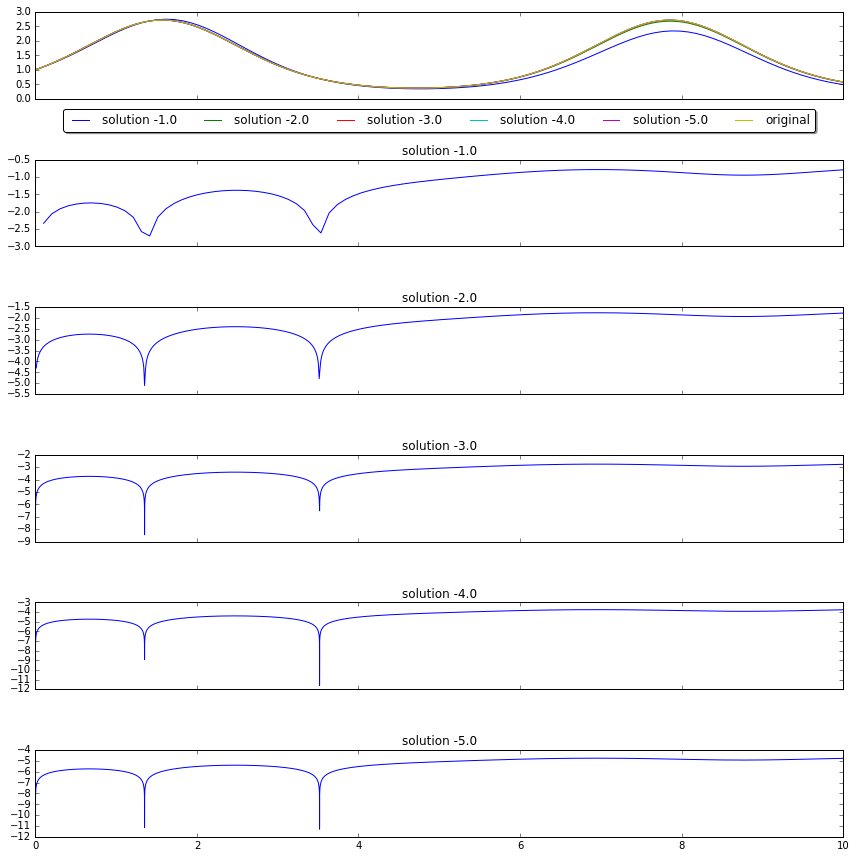

In [67]:
plot_results_for(simple_euler, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [68]:
def backward_euler_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        Ys[i+1] = Ys[i] + h*g(Xs[i+1], Y_approx)
    return Ys

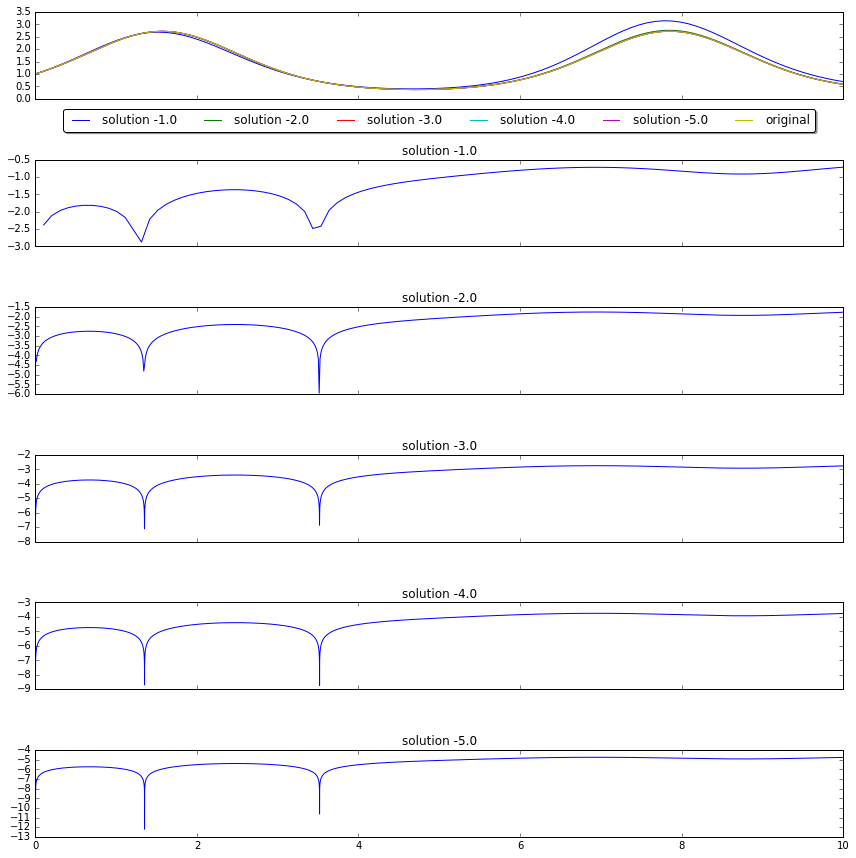

In [69]:
plot_results_for(backward_euler_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [70]:
def trapezoidal_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        Ys[i+1] = Ys[i] + h/2 *(g(Xs[i+1], Y_approx) + g(Xs[i], Ys[i]))
    return Ys

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


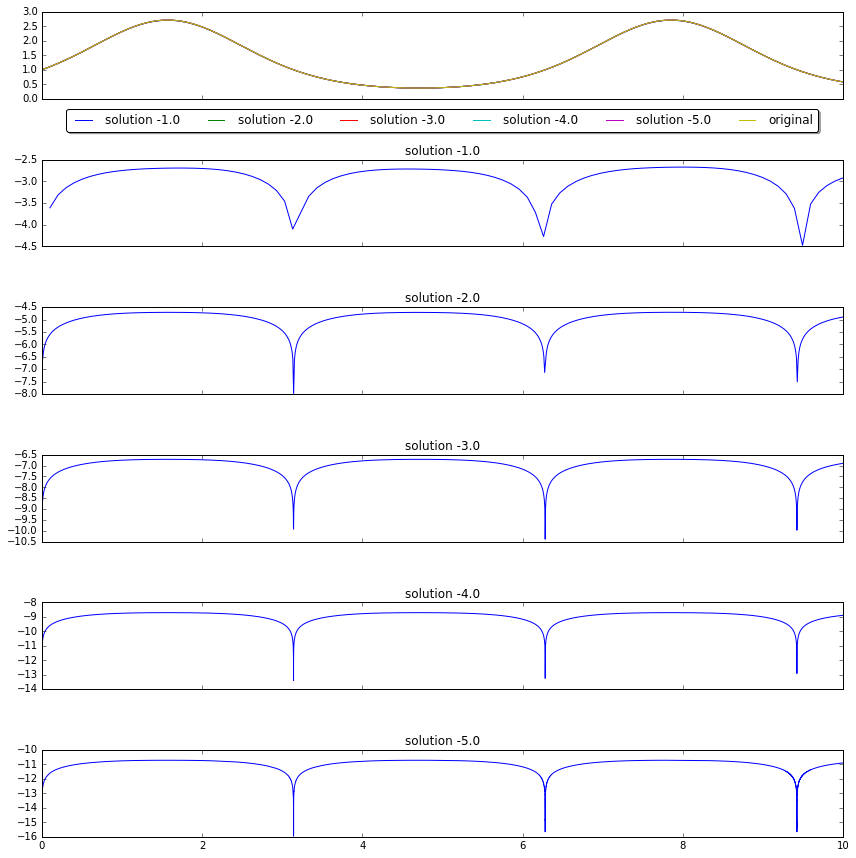

In [71]:
plot_results_for(trapezoidal_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [74]:
def iterated_backward_euler_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        for _ in range(10):
            Y_approx = Ys[i] + h*g(Xs[i+1], Y_approx)
        Ys[i+1] = Y_approx
    return Ys

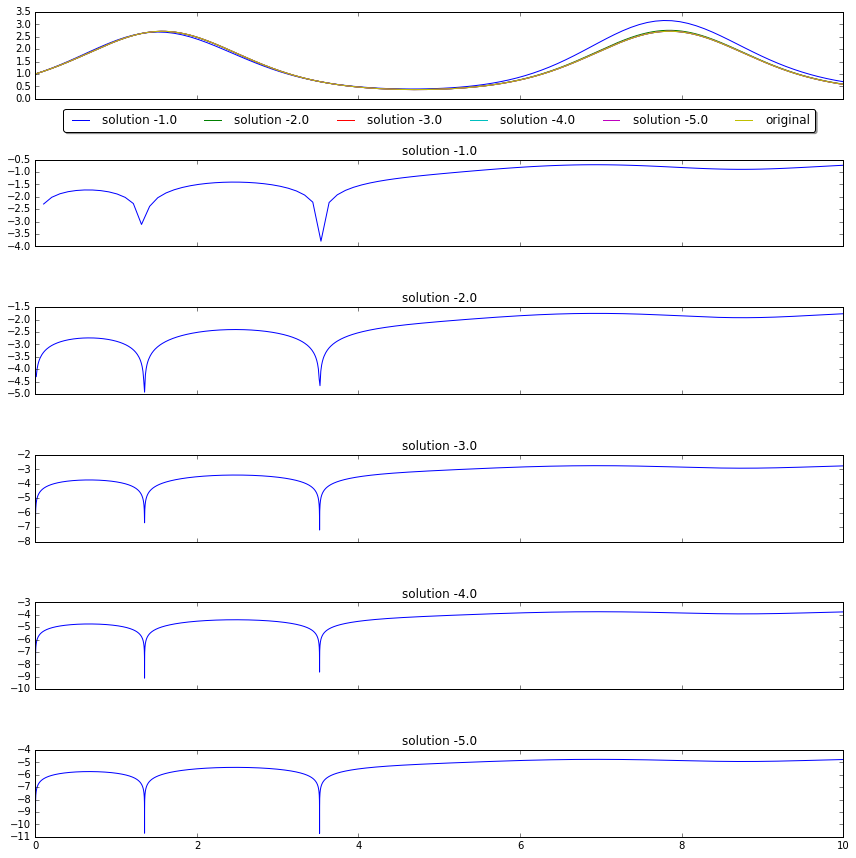

In [75]:
plot_results_for(iterated_backward_euler_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [76]:
def iterated_trapezoidal_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        for _ in range(10):
            Y_approx = Ys[i] + h/2 *(g(Xs[i+1], Y_approx) + g(Xs[i], Ys[i]))
        Ys[i+1] = Y_approx
    return Ys

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


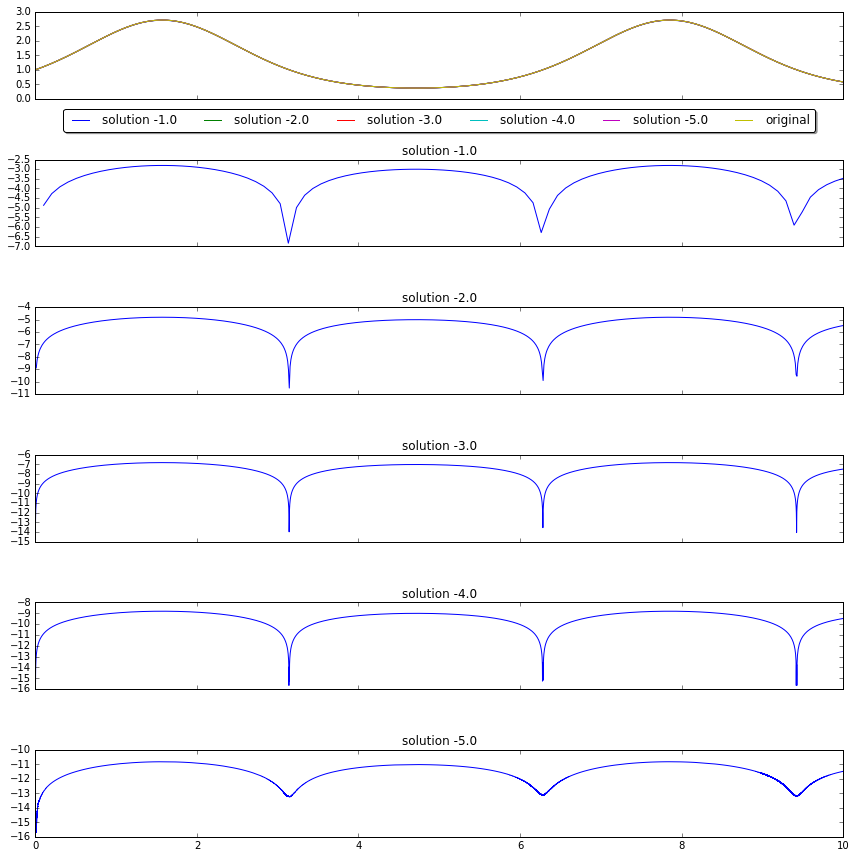

In [77]:
plot_results_for(iterated_trapezoidal_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [78]:
def middle_point(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[1])
        k2 = h*g((Xs[i] + Xs[i+1])/2., Ys[i] + k1/2.)
        Ys[i+1] = Ys[i] + k2
    return Ys

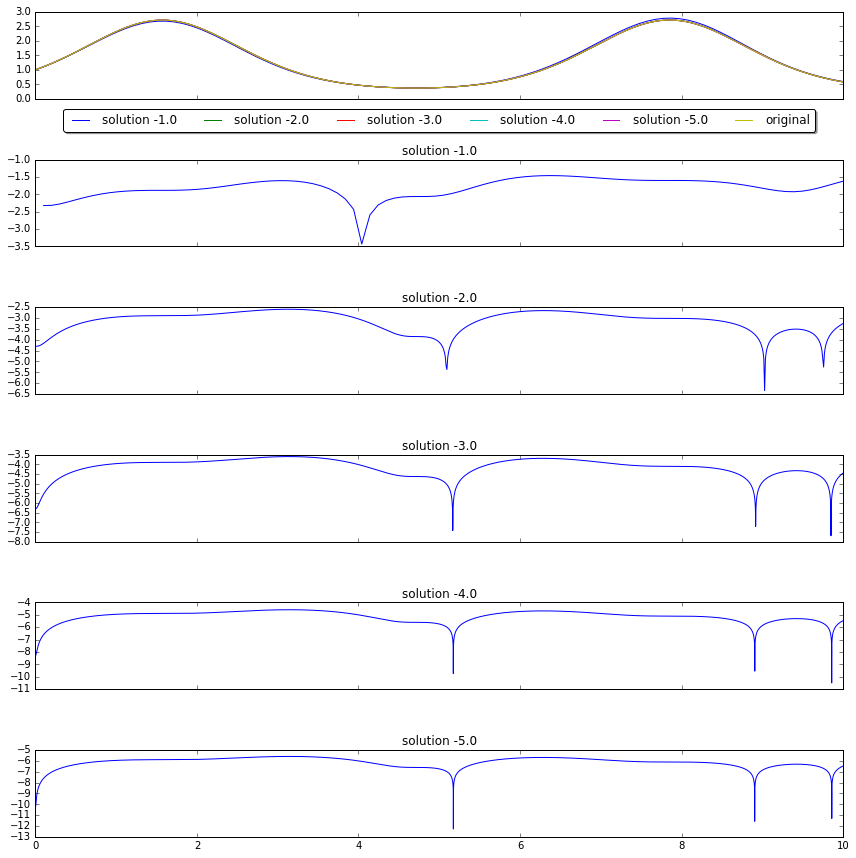

In [79]:
plot_results_for(middle_point, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [80]:
def runge_kutta(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[i])
        k2 = h*g(Xs[i] + h/2., Ys[i] + k1/2.)
        k3 = h*g(Xs[i] + h/2., Ys[i] + k2/2.)
        k4 = h*g(Xs[i+1], Ys[i] + k3)
        Ys[i+1] = Ys[i] + 1./6 * k1 + 2./6 * k2 + 2./6 * k3 + 1./6 * k4
    return Ys

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


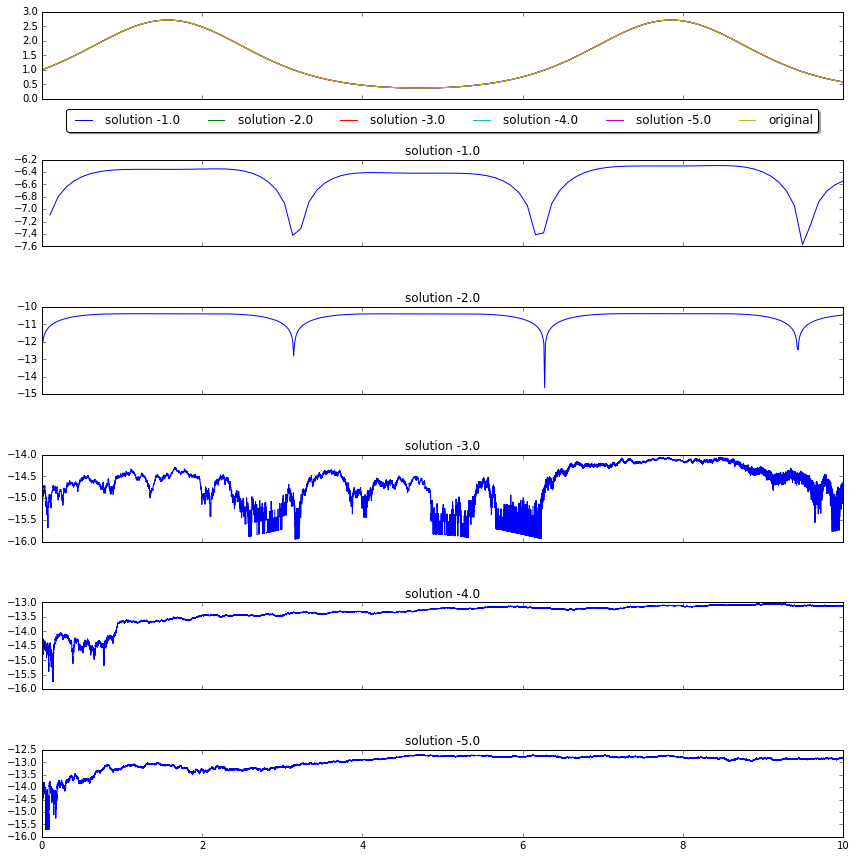

In [81]:
plot_results_for(runge_kutta, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])